# SVM

### None Linearly Separable Dataset

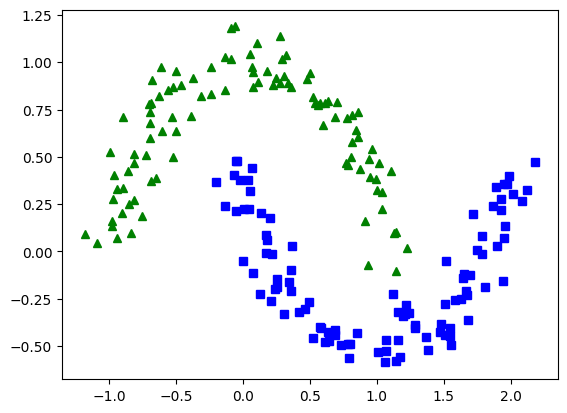

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_moons

n = 200
X, y = datasets.make_moons(n_samples = n, noise = 0.1, random_state = 93)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()

# Split the dataset into training set and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=36)

### Models with different parameter C

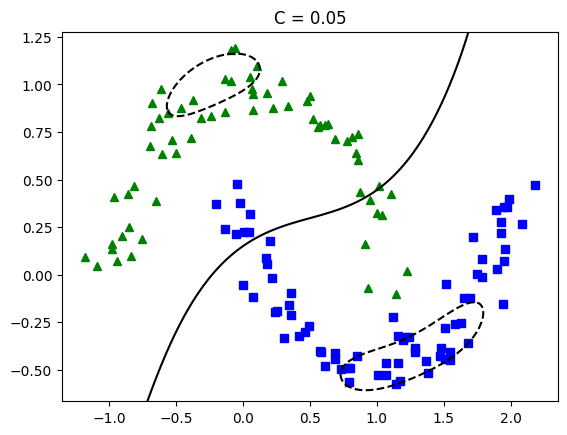

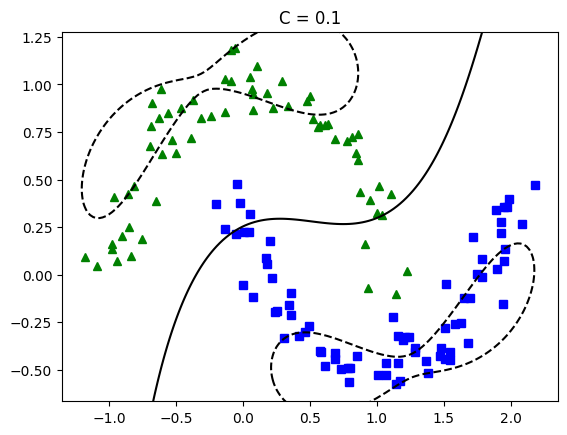

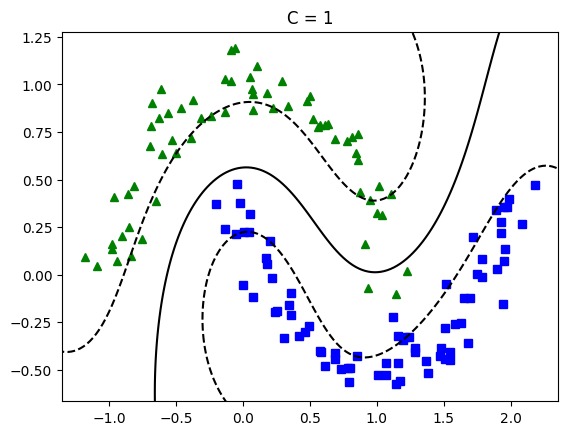

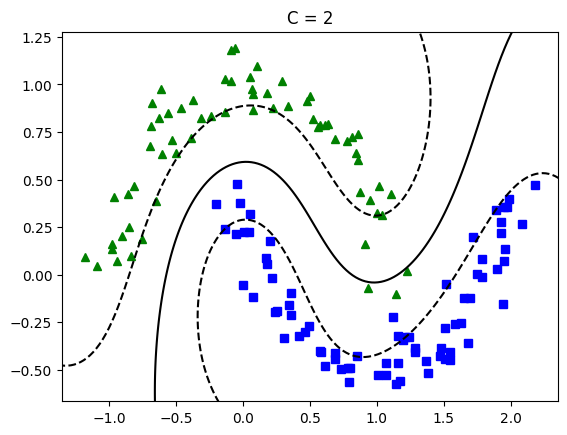

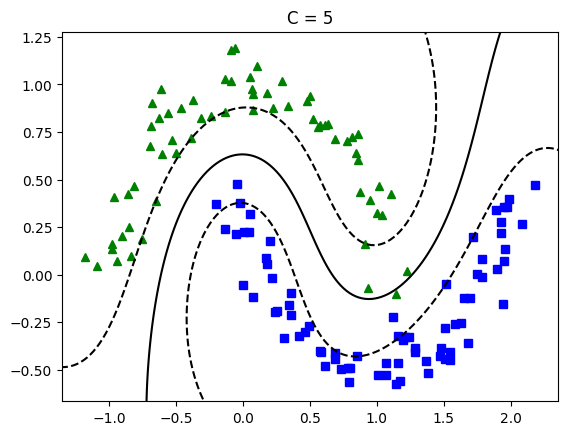

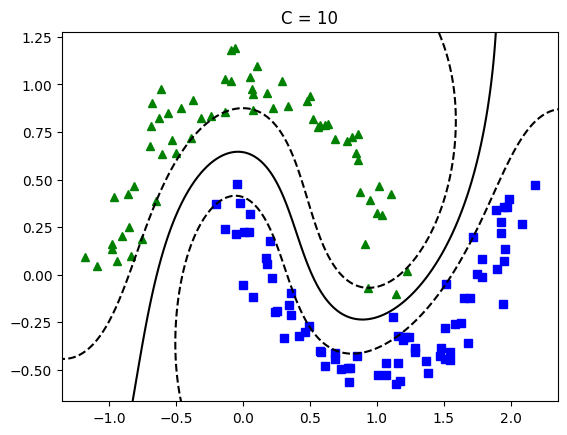

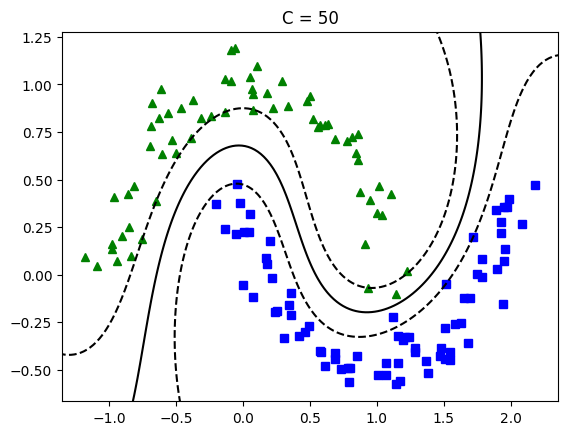

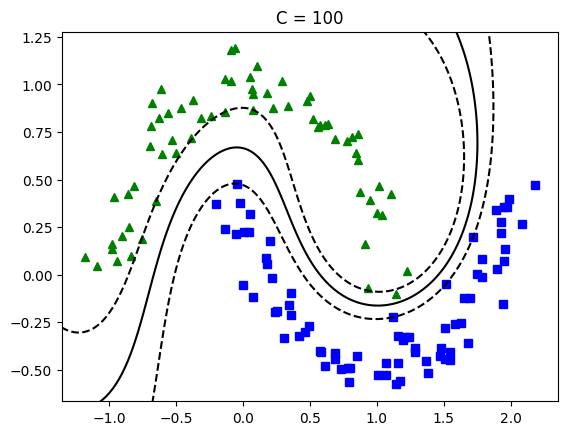

In [2]:
for val in [0.05, 0.1, 1, 2, 5, 10, 50, 100]:
    #Create an svm model
    clf = svm.SVC(C = val)
    clf.fit(X_train, y_train)  #training
    ax = plt.gca() #get current axes
    # plot our points
    plt.plot(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], 'g^')
    plt.plot(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], 'bs')

    #get the current x,y-axis limits in data coordinates
    xlim = ax.get_xlim() 
    ylim = ax.get_ylim()
    x_min, x_max = xlim[0] - 0.5, xlim[1] + 0.5
    y_min, y_max = ylim[0] - 0.5, ylim[1] + 0.5

    #Use mgrid to plot a dense multidimensional meshgrid
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    xy = np.c_[XX.ravel(), YY.ravel()]
    Z = clf.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors=['k','k','k'], alpha=1,levels=[-1,0,1],linestyles=['--', '-', '--'])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    title = "C = "+str(val)
    plt.title(title)
    plt.show()

The choice of parameter C can affect the generalization capability and complexity of the SVM model. Smaller values of C result in a sparser model that emphasizes generalization, while larger values of C lead to a denser model that prioritizes precise fitting to the training data.

### Different Kernels

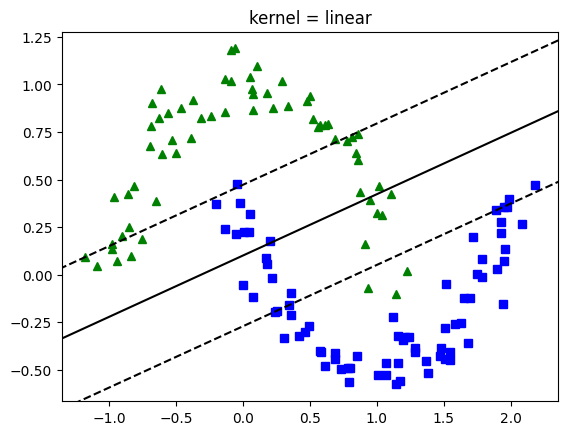

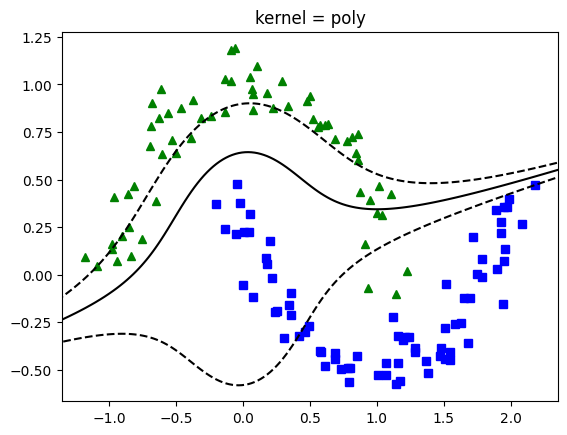

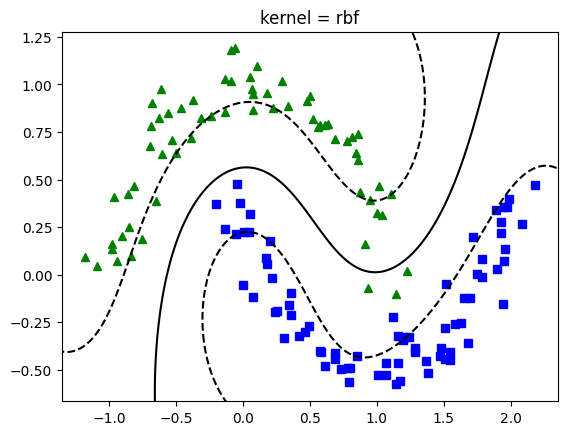

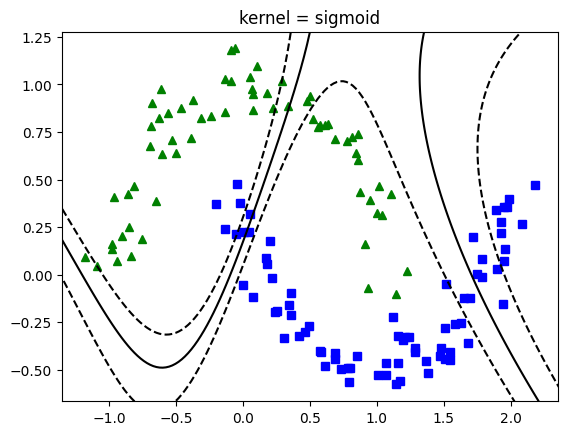

In [3]:
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    #Create an svm model
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)  #training
    ax = plt.gca() #get current axes
    # plot our points
    plt.plot(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], 'g^')
    plt.plot(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], 'bs')

    #get the current x,y-axis limits in data coordinates
    xlim = ax.get_xlim() 
    ylim = ax.get_ylim()
    x_min, x_max = xlim[0] - 0.5, xlim[1] + 0.5
    y_min, y_max = ylim[0] - 0.5, ylim[1] + 0.5

    #Use mgrid to plot a dense multidimensional meshgrid
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    xy = np.c_[XX.ravel(), YY.ravel()]
    Z = clf.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors=['k','k','k'], alpha=1,levels=[-1,0,1],linestyles=['--', '-', '--'])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    title = "kernel = "+ kernel
    plt.title(title)
    plt.show()

### Compare different kernels

In [4]:
for kernel in ('linear', 'poly', 'rbf', 'sigmoid'):
    clf = svm.SVC(kernel=kernel) # Linear Kernel
    #Train the model using the training sets
    clf.fit(X_train, y_train)
    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    print(kernel, "Accuracy:",metrics.accuracy_score(y_test, y_pred))

linear Accuracy: 0.85
poly Accuracy: 0.95
rbf Accuracy: 1.0
sigmoid Accuracy: 0.65


RBF kernel gives the best performance on the test dataset